## Support Vector Machine
### 휴먼지능정보공학과 201910787 김영서

## 1. GAUSSIAN KERNEL 시각화
### 1. Gaussian kernel 그리기
### $ f_1 = exp(-\frac{||x-1^{(1)}||^2}{2\sigma^2}) $
### $ f_2 = exp(-\frac{||v_1-v_2||^2}{2\sigma^2}) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# vector v1과 v2의 차이에 대한 Gaussian kernel 을 구하자.
# val = GaussianKernel(np.array([0, 0]), np.array([3, 5]), 1.0)
def GaussianKernel(v1, v2, sigma):
    res = np.exp((-(np.linalg.norm(v1-v2)**2))/(2*sigma**2))
    return res

In [3]:
# 힌트
print np.power([2, 3], 2)
print np.sum([2, 3])

val = GaussianKernel(np.array([0,0]), np.array([3,5]), 1.0)
print val

[4 9]
5
4.139937718785167e-08


In [35]:
# 1. x1, x2, Z 값 구하기
d = 100 # # of split
x1 = np.linspace(0, 6, d)  # 0 ~ 6
x2 = np.linspace(0, 10, d)  # 0 ~ 10
l1 = [3, 5]  # 랜드마크

Z = np.zeros((d, d)) # (100, 100)  # 가우시안 분포의 높이 값
sigma = 1.0 # 1, 0.5(좁게), 1.5(넓게)
for i, t1 in enumerate(x1):
    for j, t2 in enumerate(x2):
        val = GaussianKernel(np.array([t1, t2]), l1, sigma)
        Z[i,j] = val

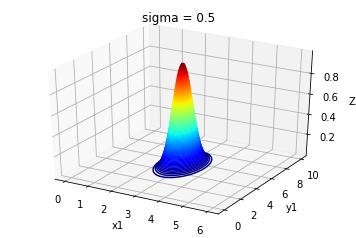

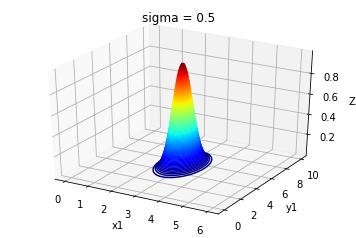

In [29]:
# 2. 그리기 - sigma = 0.5
from mpl_toolkits import mplot3d

pX, pY = np.meshgrid(x1, x2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX, pY, Z, 100, cmap='jet')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
ax.set_zlabel('Z')
plt.title("sigma = 0.5")
plt.show()

#ax.view_init(60, 35)
fig

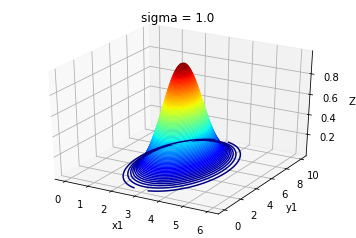

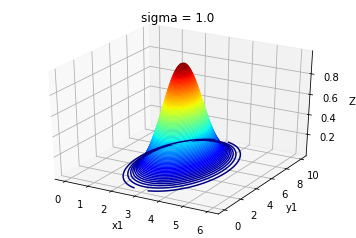

In [36]:
# 2. 그리기 - sigma = 1.0
from mpl_toolkits import mplot3d

pX, pY = np.meshgrid(x1, x2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX, pY, Z, 100, cmap='jet')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
ax.set_zlabel('Z')
plt.title("sigma = 1.0")
plt.show()

#ax.view_init(60, 35)
fig

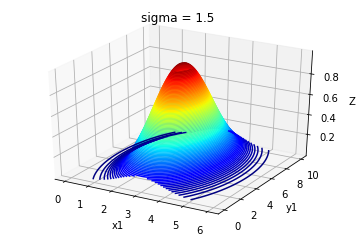

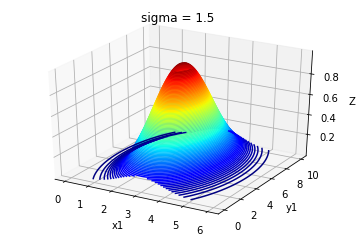

In [34]:
# 2. 그리기 - sigma = 1.5
from mpl_toolkits import mplot3d

pX, pY = np.meshgrid(x1, x2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX, pY, Z, 100, cmap='jet')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
ax.set_zlabel('Z')
plt.title("sigma = 1.5")
plt.show()

#ax.view_init(60, 35)
fig

## 2. 선형 SVM 분류
### 1) 데이터 읽기

In [13]:
import numpy as np

# (x1), (x2), (0 or 1)
# Ng, Machine Learning, Coursera, m1-ex6 중
from scipy.io import loadmat
data = loadmat('data1.mat')
print data

X = data['X'] # x1, x2의 값
y = data['y'] # 0 or 1
m = len(y)

{'y': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8), 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182

In [14]:
print X.shape, y.shape

(51, 2) (51, 1)


### 3) 그래프 그리기

In [15]:
# y=1, y=0 데이터 인덱스 찾기
pos = []
neg = []

for (i, val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)
print pos
print neg

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


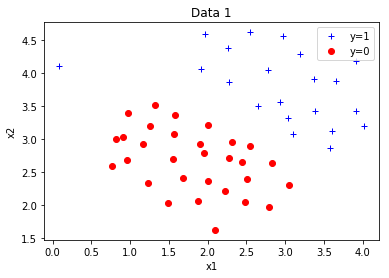

In [16]:
import matplotlib.pyplot as plt
# X[:,1].reshape(-1): 한 줄로 피기. (m,) ->(m)
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')
plt.title("Data 1")
plt.show()

### 3) 학습

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 평균0, 표준편차 1로 만듦 <feature nprmalization>
from sklearn.svm import LinearSVC
# Linear Support Vector Classification(Linear Support Vector Machine)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    # C=1(규제 강화->무뎌지게), C=100(규제 약화->예민하게)
])

svm_clf.fit(X, y)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [18]:
svm_clf.predict([[2.3, 2.7],
                [3.7, 3.9]])

array([0, 1], dtype=uint8)

### 4) Decision boundary

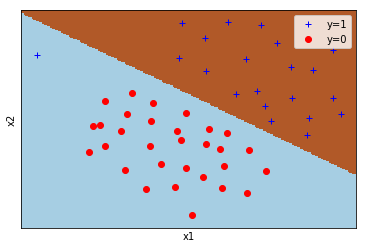

In [19]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 3. 비선형 SVM 분류

In [20]:
import numpy as np

# (x1), (x2), (0 or 1)
# Ng, Machine Learning, Coursera, ml-ex6 중
from scipy.io import loadmat
data = loadmat('data2.mat')
print data

X = data['X'] # x1, x2의 값
y = data['y'] # 0 or 1
m = len(y)

{'y': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]

In [21]:
print X.shape, y.shape

(863, 2) (863, 1)


### 2) 그래프 그리기

In [23]:
# y = 1, y = 0 데이터 인덱스 찾기
pos = []
neg = []

for(i, val) in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)
print pos
print neg

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,

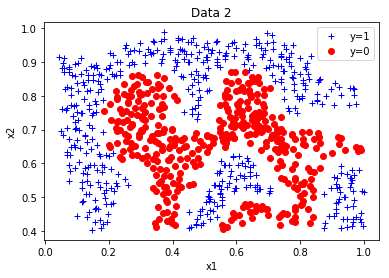

In [24]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')
plt.title("Data 2")
plt.show()

### 3) 학습

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 평균0, 표준편차 1로 만듦 <feature nprmalization>
from sklearn.svm import SVC
# Linear Support Vector Classification(Linear Support Vector Machine)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", gamma=10, C=1))
    # * kernel: "rbf", "poly", ...
    # * C=1(규제 강화->무뎌지게), C=100(규제 약화->예민하게)
    # * gamma: 1/sigma.
    # 크면 가우시안분포 좁아짐->샘플 영향 범위 작아짐->불규칙&샘플따라 구불구불->예민
    # 작으면 가우시안분포 넒어짐->샘플 영향 범위 넓어짐->smooth->무뎌짐
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

### 4) Decision boundary

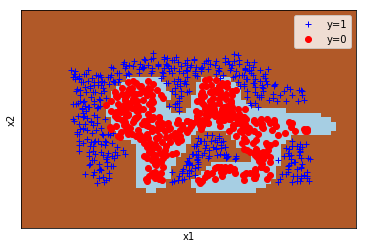

In [26]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()